In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# خواندن فایل CSV و ذخیره داده در یک DataFrame


df = pd.read_csv('/content/gdrive/MyDrive/company2.csv')

# نرمال‌سازی ستون‌ها با استفاده از Min-Max Scaler
data = df.iloc[:, 1:]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

df_normalized = pd.DataFrame(normalized_data, columns=df.columns[1:])

# اضافه کردن ستون اول به DataFrame جدید
df_normalized.insert(0, df.columns[0], df.iloc[:, 0])

# ذخیره کردن DataFrame جدید به یک فایل CSV
df_normalized.to_csv('company2.csv', index=False)


In [ ]:
df_normalized.head()

,date,Rena.Investment,S*Arak.M..Mfg.,S*Azarab.Ind.,S*EN.Bank,S*HiWeb,S*I..N..C..Ind.,S*Iran.Transfo,S*IRI.Marine.Co.,S*Isf..Oil.Ref.Co.,...,MAPNA,Mehrcam.Pars,Mellat.Inv..Bank,Motorsazan,N..I..L..Z.,Nirou.Inv.,Tuka.Trans.,VAMCO,Zamyad,Zar.Makaron
0,20230417,0.981903,0.940317,0.940363,1.000000,0.940891,0.518072,0.901255,0.257836,1.000000,...,0.923836,0.992854,0.764062,0.852794,1.000000,0.916842,0.129912,1.000000,0.224950,0.336117
1,20230416,0.997415,0.977467,1.000000,0.948179,0.979757,0.532868,0.883252,0.219919,0.980916,...,0.936530,0.979990,0.787500,0.924253,0.914144,0.944211,0.118712,0.969040,0.209249,0.339132
2,20230415,1.000000,1.000000,0.954624,0.905593,1.000000,0.541323,0.929078,0.189080,0.950382,...,1.000000,0.991901,0.503125,1.000000,0.824814,1.000000,0.104121,0.860681,0.187839,0.359081
3,20230411,0.868149,0.950061,0.894987,0.796306,0.873684,0.492708,0.862520,0.153691,0.835878,...,0.880113,0.963792,0.189062,0.955695,0.734491,0.886316,0.090426,0.756579,0.167142,0.331014
4,20230410,0.819028,0.934836,0.840536,0.813751,0.913360,0.520186,0.912166,0.141557,0.874046,...,0.929478,0.976179,1.000000,0.895670,0.715633,0.894211,0.078139,0.665635,0.137168,0.313152


In [ ]:



correlation_matrix = df_normalized.iloc[:, 1:].corr()

# نمایش نسبت همبستگی
print(correlation_matrix)


                 Rena.Investment  S*Arak.M..Mfg.  S*Azarab.Ind.  S*EN.Bank  \
Rena.Investment         1.000000        0.639175       0.319750   0.770217   
S*Arak.M..Mfg.          0.639175        1.000000       0.891158   0.919053   
S*Azarab.Ind.           0.319750        0.891158       1.000000   0.750147   
S*EN.Bank               0.770217        0.919053       0.750147   1.000000   
S*HiWeb                 0.631725        0.817799       0.661126   0.881907   
...                          ...             ...            ...        ...   
Nirou.Inv.              0.684196        0.934444       0.769978   0.950942   
Tuka.Trans.            -0.764538       -0.573873      -0.338894  -0.619228   
VAMCO                   0.841467        0.742464       0.497205   0.832678   
Zamyad                 -0.057773       -0.554453      -0.600375  -0.430510   
Zar.Makaron            -0.502086       -0.273173      -0.147544  -0.269330   

                  S*HiWeb  S*I..N..C..Ind.  S*Iran.Transfo  S*I

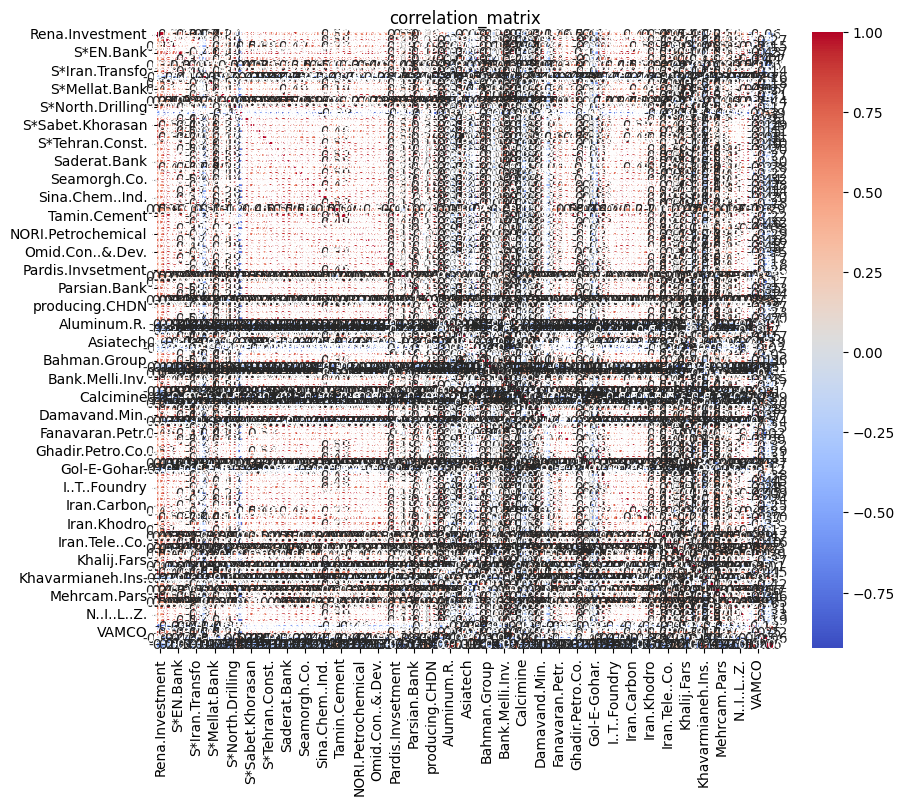

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('correlation_matrix')
plt.show()


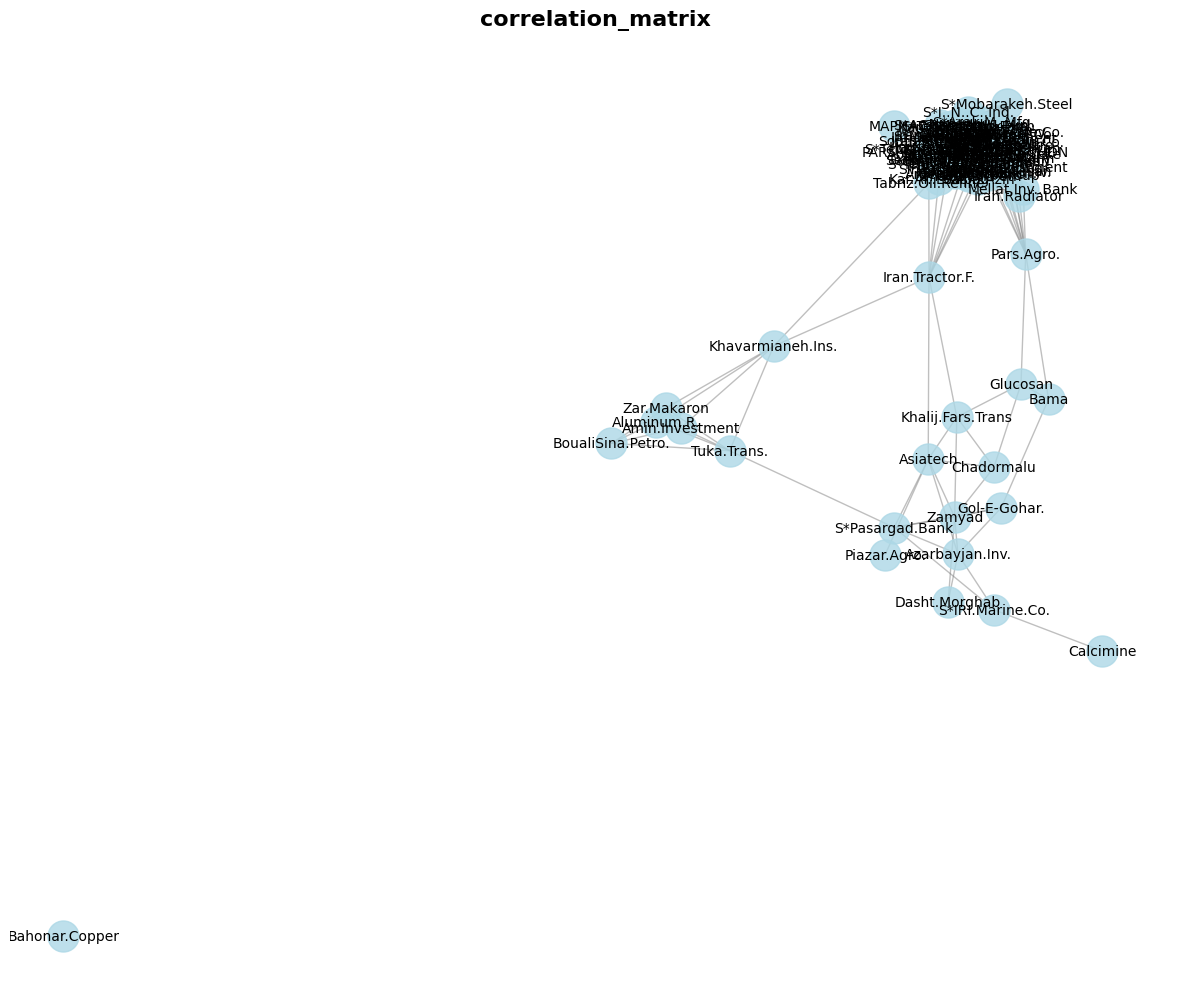

In [ ]:

import networkx as nx
# ایجاد یک گراف خالی
G = nx.Graph()

# اضافه کردن نود‌ها به گراف
G.add_nodes_from(correlation_matrix.columns)

# اضافه کردن یال‌های با نسبت همبستگی بیشتر از 0.5 به گراف
for i, column_i in enumerate(correlation_matrix.columns):
    for j, column_j in enumerate(correlation_matrix.columns):
        if i < j and correlation_matrix.loc[column_i, column_j] > 0.5:
            G.add_edge(column_i, column_j)


plt.figure(figsize=(12, 10))  # افزایش اندازه نمایش گراف
pos = nx.spring_layout(G, seed=42)  # تعیین موقعیت نودها در گراف با تعیین یک seed ثابت
node_color = 'lightblue'
node_size = 500
edge_color = 'gray'
font_size = 10
font_family = 'sans-serif'

# رسم نود‌ها و یال‌ها با پارامترهای جدید
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.8)  # افزایش شفافیت نود‌ها
nx.draw_networkx_edges(G, pos, edge_color=edge_color, alpha=0.5)  # افزایش شفافیت یال‌ها
nx.draw_networkx_labels(G, pos, font_size=font_size, font_family=font_family)

# تنظیمات نمودار
plt.title('correlation_matrix', fontsize=16, fontweight='bold')
plt.axis('off')

plt.tight_layout()  # بهبود چیدمان نمودار

plt.show()



In [ ]:


# محاسبه درجه هر نود در گراف
degrees = dict(G.degree())

# یافتن بزرگترین درجه
max_degree = max(degrees.values())

# محاسبه متوسط درجه
avg_degree = sum(degrees.values()) / len(degrees)
max_degree_node = [node for node, degree in degrees.items() if degree == max_degree]

# نمایش بزرگترین درجه و متوسط درجه
print("بزرگترین درجه گراف:", max_degree)
print("متوسط درجه گراف:", avg_degree)
print("نود با بزرگترین درجه:", max_degree_node)


بزرگترین درجه گراف: 78
متوسط درجه گراف: 57.0
نود با بزرگترین درجه: ['Saderat.Bank']


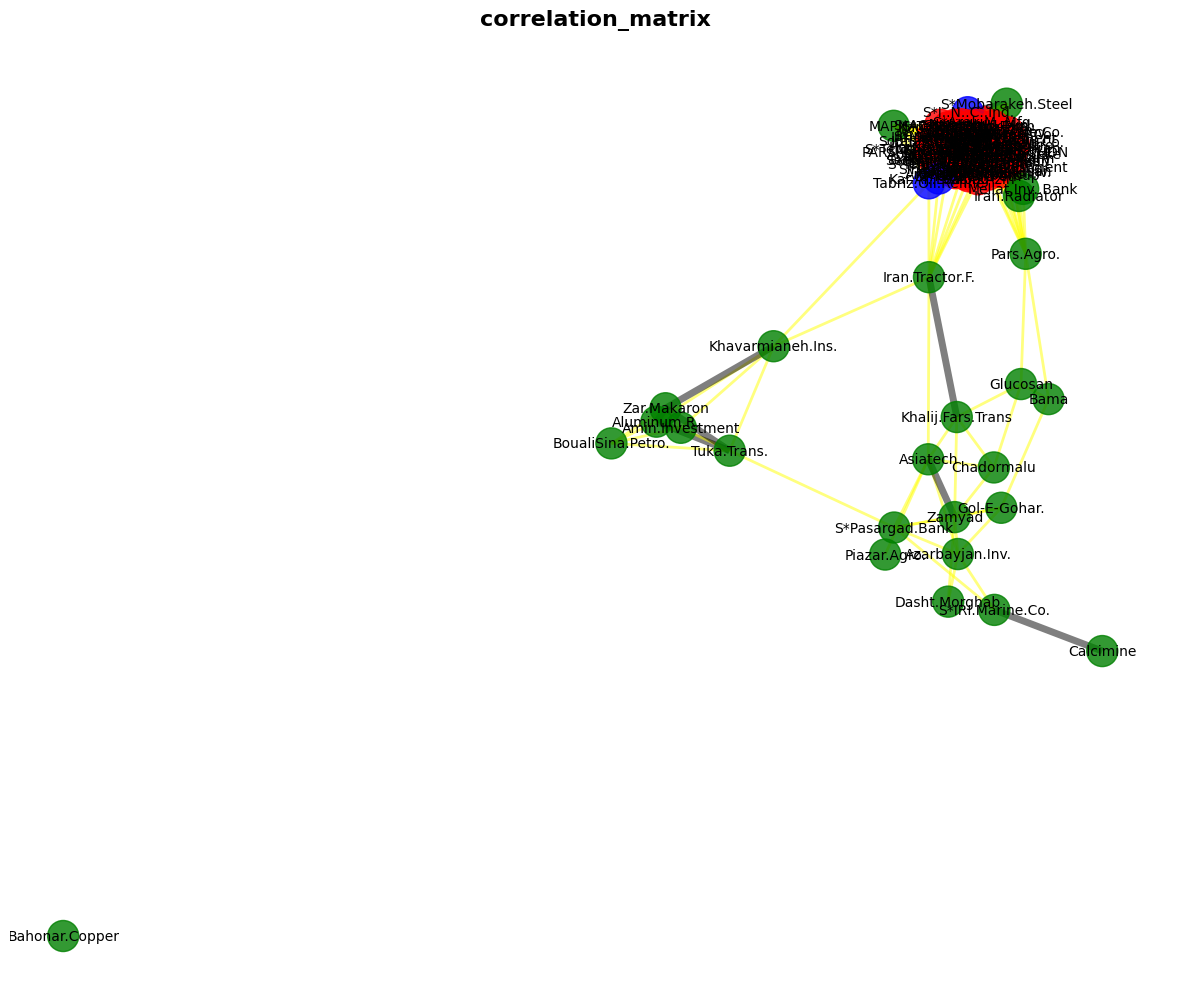

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# تعیین شرایط رنگ‌ها و ضخامت‌ها
node_color = []
edge_color = []
edge_width = []

for node in G.nodes:
    degree = G.degree[node]

    if 60 <= degree <= 80:
        node_color.append('red')
    elif 0 <= degree <= 50:
        node_color.append('green')
    else:
        node_color.append('blue')

for edge in G.edges:
    correlation = correlation_matrix.loc[edge[0], edge[1]]

    if correlation > 0.75:
        edge_color.append('black')
        edge_width.append(5.0)
    elif 0.5 <= correlation <= 0.75:
        edge_color.append('yellow')
        edge_width.append(2.0)
    else:
        edge_color.append('gray')
        edge_width.append(0.5)

# رسم گراف با رنگ‌ها و ضخامت‌ها
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
font_size = 10
font_family = 'sans-serif'

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=edge_width, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=font_size, font_family=font_family)

plt.title('correlation_matrix', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()

plt.show()


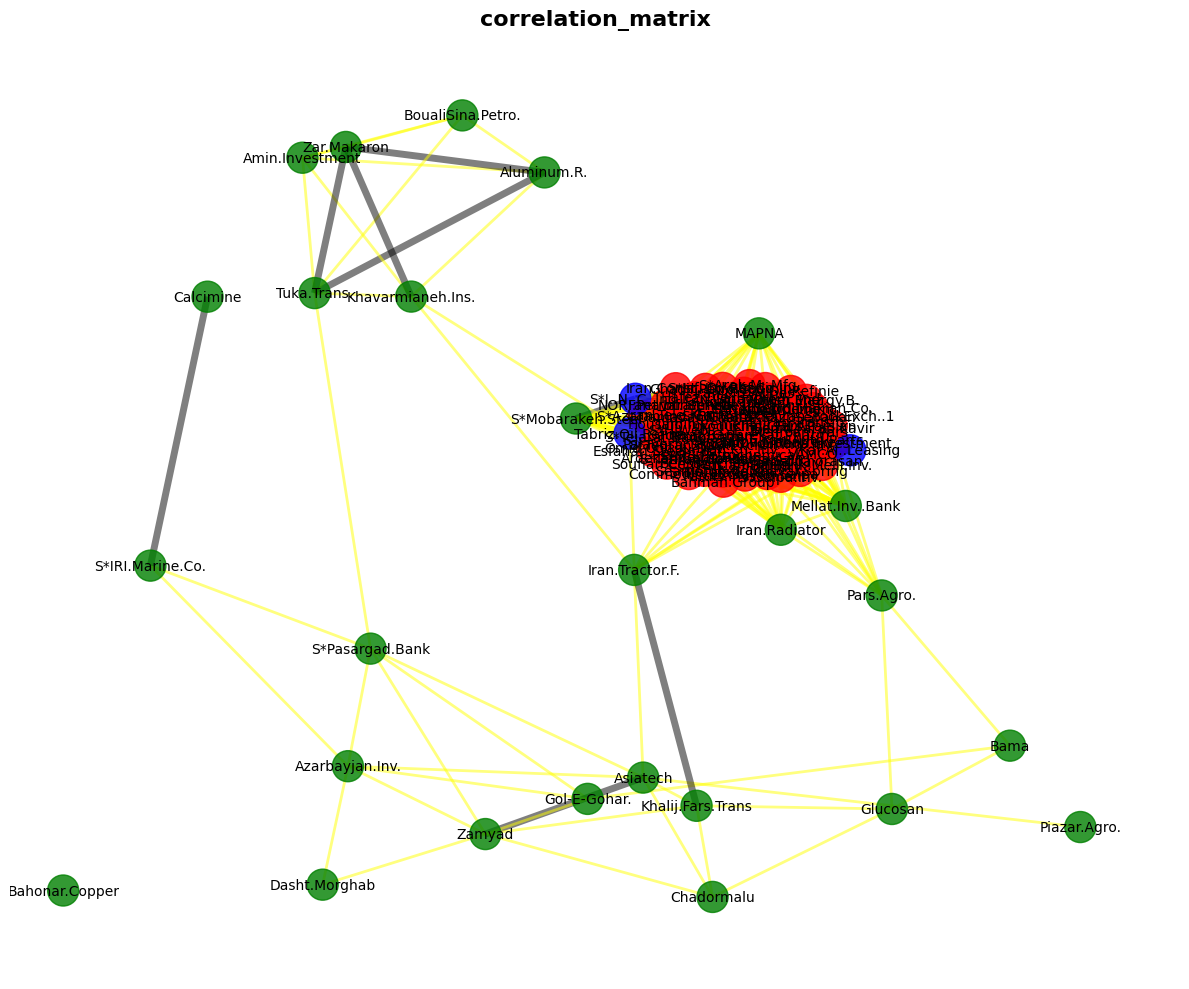

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# تعیین شرایط رنگ‌ها و ضخامت‌ها
node_color = []
edge_color = []
edge_width = []

for node in G.nodes:
    degree = G.degree[node]

    if 60 <= degree <= 80:
        node_color.append('red')
    elif 0 <= degree <= 50:
        node_color.append('green')
    else:
        node_color.append('blue')

for edge in G.edges:
    correlation = correlation_matrix.loc[edge[0], edge[1]]

    if correlation > 0.75:
        edge_color.append('black')
        edge_width.append(5.0)
    elif 0.5 <= correlation <= 0.75:
        edge_color.append('yellow')
        edge_width.append(2.0)
    else:
        edge_color.append('gray')
        edge_width.append(0.5)

# رسم گراف با رنگ‌ها و ضخامت‌ها
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.3)
font_size = 10
font_family = 'sans-serif'

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=edge_width, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=font_size, font_family=font_family)

plt.title('correlation_matrix', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()

plt.show()


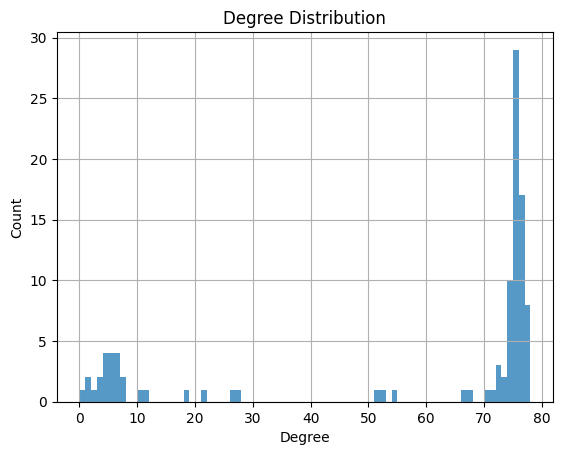

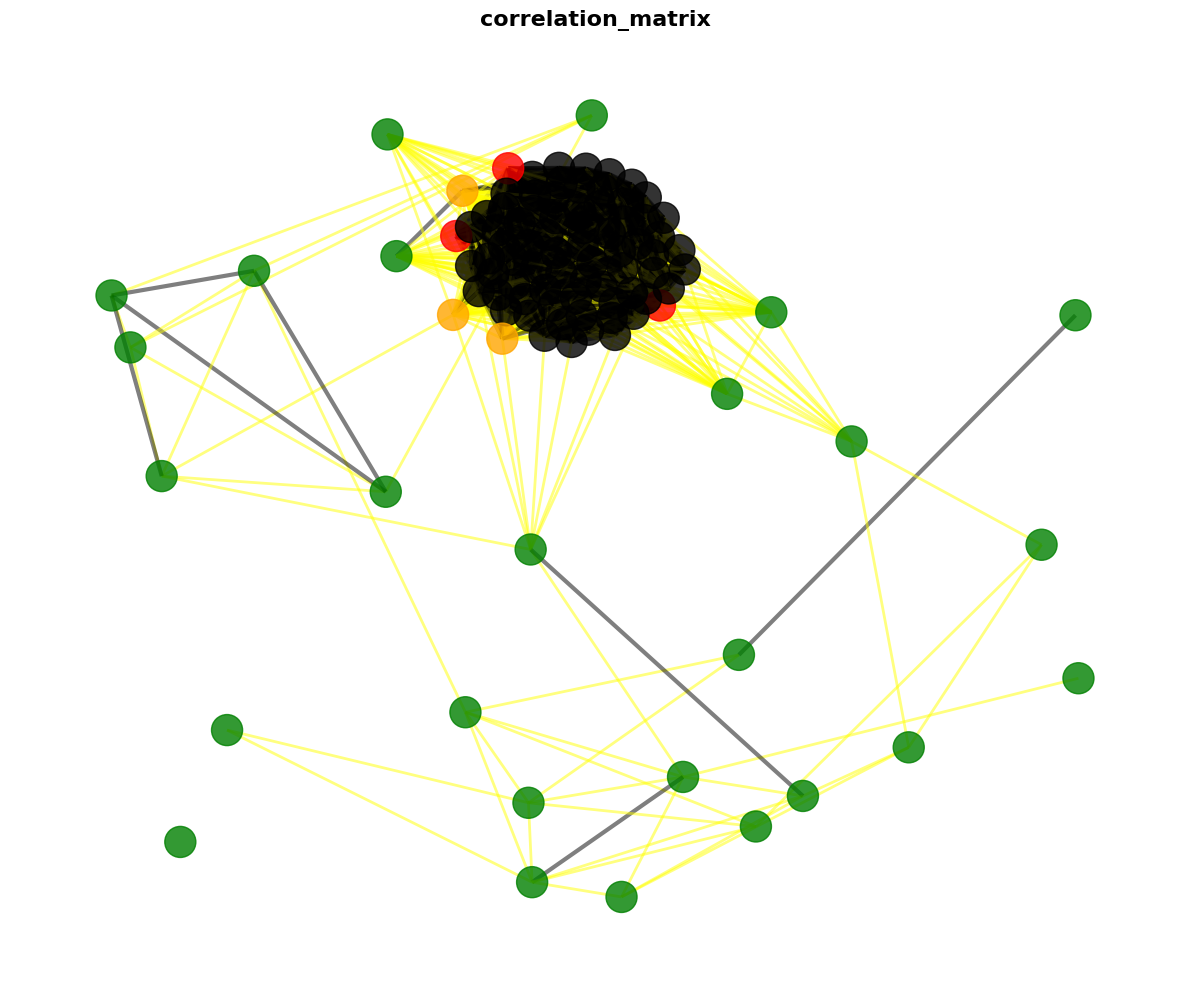

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# تعیین شرایط رنگ‌ها و ضخامت‌ها
node_color = []
edge_color = []
edge_width = []

for node in G.nodes:
    degree = G.degree[node]

    if 60 <= degree <= 70:
        node_color.append('red')
    elif 70 <= degree <= 80:
        node_color.append('black')
    elif 0 <= degree <= 50:
        node_color.append('green')
    else:
        node_color.append('orange')

for edge in G.edges:
    correlation = correlation_matrix.loc[edge[0], edge[1]]

    if correlation > 0.75:
        edge_color.append('black')
        edge_width.append(3.0)
    elif 0.5 <= correlation <= 0.75:
        edge_color.append('yellow')
        edge_width.append(2.0)
    else:
        edge_color.append('gray')
        edge_width.append(0.5)

# رسم گراف بدون لیبل
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.5)
font_size = 10
font_family = 'sans-serif'

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=edge_width, alpha=0.5)

plt.title('correlation_matrix', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()

plt.show()


In [ ]:
num_edges = G.number_of_edges()
print("تعداد یال‌ها:", num_edges)


تعداد یال‌ها: 2907


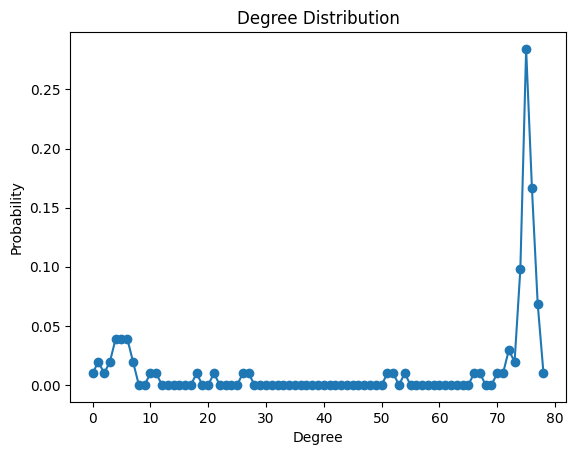

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# محاسبه درجه هر گره
degrees = [G.degree[node] for node in G.nodes]

# محاسبه احتمال توزیع درجه
degree_probabilities, degree_bins = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 2), density=True)

# رسم نمودار خطی برای توزیع درجه
plt.plot(degree_bins[:-1], degree_probabilities, marker='o')

# تنظیمات نمودار
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution')

plt.show()


In [ ]:
components = nx.connected_components(G)
average_path_lengths = []

for component in components:
    subgraph = G.subgraph(component)
    average_path_length = nx.average_shortest_path_length(subgraph)
    average_path_lengths.append(average_path_length)

average_path_length = sum(average_path_lengths) / len(average_path_lengths)
print("متوسط طول مسیر در شبکه:", average_path_length)


متوسط طول مسیر در شبکه: 0.989009900990099


In [ ]:
clustering_coefficient = nx.average_clustering(G)
print("ضریب خوشه‌بندی متوسط گراف:", clustering_coefficient)


ضریب خوشه‌بندی متوسط گراف: 0.8549341687183162


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# پیدا کردن کامیونیتی‌ها با استفاده از تابع community.greedy_modularity_communities
communities = list(nx.community.greedy_modularity_communities(G))

# نمایش گراف و کامیونیتی‌ها
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=f"C{i+1}", node_size=300, alpha=0.8)
    print(community)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

plt.axis("off")
plt.show()

In [ ]:
# نمایش هر کامیونیتی به صورت جداگانه
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    subgraph = G.subgraph(community)
    nx.draw(subgraph, pos, with_labels=True, node_color=f"C{i+1}", node_size=300, alpha=0.8)
    plt.title(f"Community {i+1}")
    plt.show()

In [1]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# نمایش توزیع درجه به صورت نمودار
plt.hist(degree_sequence, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()

# بررسی توزیع درجه آیا مشابه قانون توانی است یا خیر
from scipy.stats import powerlaw
fit = powerlaw.fit(degree_sequence)

print("Power-law fit results:")
print(f"Alpha (scaling parameter): {fit[0]}")
print(f"Ks (Kolmogorov-Smirnov statistic): {fit[1]}")
print(f"p-value: {fit[2]}")

NameError: ignored